Cloning into 'Amthal'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 101 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (101/101), 2.84 MiB | 5.72 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/Amthal/Amthal
Data loaded successfully. Found 4078 instances.



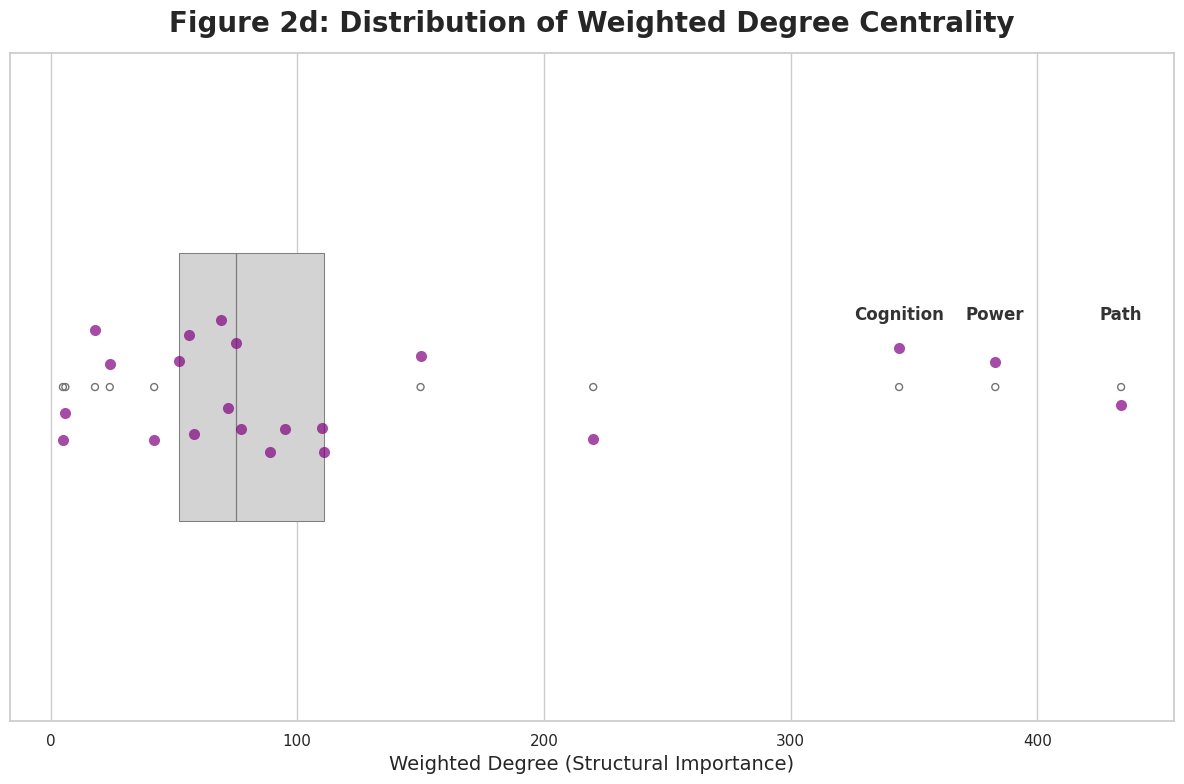

In [2]:
#@title  **Distribution of Weighted Degree Centrality**



# --- إعداد عام ---
!git clone https://github.com/NoorBayan/Amthal.git
%cd Amthal

from utility import *
from IPython.display import display, HTML, clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
import io

import warnings

# تجاهل التحذيرات الخاصة بالخطوط
warnings.filterwarnings("ignore", message=".*font_manager.*")

# تعيين خط متوفر في كل بيئات matplotlib
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]

# --- [الخطوة 1: تحميل وتجهيز البيانات] ---
INSTANCES_FILE_PATH = '/content/Amthal/data/processed/instances.csv'
try:
    df = pd.read_csv(INSTANCES_FILE_PATH, sep='\t', encoding='utf-16')
    df['Dominant_Concept']=[Dominant_Concept_dic[i]['en'] for i in df.Dominant_Concept]
    df['Valence']=[Valence_dic[i]['ar'] for i in df.Valence]
    df['Revelation_Phase']=[Revelation_Phase_dic[i]['ar'] for i in df.Revelation_Phase]
    df['Abstraction_Level']=[Abstraction_Level_dic[i]['ar'] for i in df.Abstraction_Level]
    print(f"Data loaded successfully. Found {len(df)} instances.\n")
except FileNotFoundError:
    print(f"⚠️ ERROR: File not found at '{INSTANCES_FILE_PATH}'. Please check the path and try again.")
    exit()

# (كود بناء edge_weights)
grouped = df.groupby(['Sura_No', 'Aya_No'])['Dominant_Concept'].apply(list)
edges = []
for concepts in grouped:
    if len(concepts) > 1:
        for combo in combinations(set(concepts), 2):
            edges.append(tuple(sorted(combo)))
edge_weights = pd.DataFrame(edges, columns=['source', 'target'])
edge_weights = edge_weights.value_counts().reset_index(name='weight')

# --- 1 & 2. تحميل البيانات وحساب الدرجات (نفس الكود السابق) ---
node_degrees = {}
for index, row in edge_weights.iterrows():
    source, target, weight = row['source'], row['target'], row['weight']
    node_degrees[source] = node_degrees.get(source, 0) + weight
    node_degrees[target] = node_degrees.get(target, 0) + weight
nodes_df = pd.DataFrame(list(node_degrees.items()), columns=['Dominant_Concept', 'Weighted_Degree'])


# --- 3. إعداد الرسم البياني الاحترافي (النسخة المحسنة) ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# إنشاء الرسم البياني المدمج
# Boxenplot هو نسخة محسنة من Boxplot، وهو جيد لإظهار تفاصيل التوزيع
sns.boxenplot(
    data=nodes_df,
    x='Weighted_Degree',
    color='lightgray',
    width=0.4,
    ax=ax
)

# إضافة Strip plot لإظهار كل نقطة بيانات فردية
sns.stripplot(
    data=nodes_df,
    x='Weighted_Degree',
    color='purple',
    size=8,          # حجم النقاط
    alpha=0.7,       # شفافية النقاط
    jitter=0.1,      # إضافة "اهتزاز" عمودي طفيف لمنع تداخل النقاط
    ax=ax
)

# --- 4. إضافة التحسينات والتعليقات ---
ax.set_title('Figure 2d: Distribution of Weighted Degree Centrality', fontsize=20, fontweight='bold', pad=15)
ax.set_xlabel('Weighted Degree (Structural Importance)', fontsize=14)
ax.set_ylabel('') # إخفاء تسمية المحور الصادي لأنه غير مهم هنا
ax.tick_params(axis='y', length=0) # إخفاء علامات المحور الصادي

# إضافة تعليقات على النقاط الأكثر أهمية (المحاور)
# فرز البيانات لتحديد أهم 3 نقاط
top_3_hubs = nodes_df.sort_values(by='Weighted_Degree', ascending=False).head(3)

for i, hub in top_3_hubs.iterrows():
    ax.text(hub['Weighted_Degree'], # موقع X للنص
            -0.1, # موقع Y للنص (أسفل النقطة قليلاً)
            hub['Dominant_Concept'], # النص (اسم المفهوم)
            ha='center', # محاذاة أفقية
            fontsize=12,
            fontweight='bold',
            color='#333333'
           )

# --- 5. الحفظ والعرض ---
plt.tight_layout()
plt.savefig('Figure_2d_Distribution_Box_Strip.png', dpi=300, bbox_inches='tight')
plt.show()